#  ðŸ’» Laptops - Analysis

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re

%matplotlib inline

#### Format

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# 

## Load the date

In [3]:
# https://www.kaggle.com/muhammetvarl/laptop-price

path = '../Datasets/Laptop Prices/laptops.csv'

In [4]:
df = pd.read_csv(path, encoding='latin-1')

# 

## Let's take a look

In [5]:
df.head()

Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook   13.30   
1           2   Apple  Macbook Air  Ultrabook   13.30   
2           3      HP       250 G6   Notebook   15.60   
3           4   Apple  MacBook Pro  Ultrabook   15.40   
4           5   Apple  MacBook Pro  Ultrabook   13.30   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0     1,339.69  
1       898.94  
2       575.00  
3     2,537.45  
4     1,803.60

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 914.6 KB


In [7]:
df.select_dtypes(include=['object']).describe()

Company Product  TypeName   ScreenResolution  \
count     1303    1303      1303               1303   
unique      19     618         6                 40   
top       Dell  XPS 13  Notebook  Full HD 1920x1080   
freq       297      30       727                507   

                               Cpu   Ram     Memory                    Gpu  \
count                         1303  1303       1303                   1303   
unique                         118     9         39                    110   
top     Intel Core i5 7200U 2.5GHz   8GB  256GB SSD  Intel HD Graphics 620   
freq                           190   619        412                    281   

             OpSys Weight  
count         1303   1303  
unique           9    179  
top     Windows 10  2.2kg  
freq          1072    121

In [8]:
df.select_dtypes(exclude=['object']).describe()

Unnamed: 0   Inches  Price_euros
count    1,303.00 1,303.00     1,303.00
mean       660.16    15.02     1,123.69
std        381.17     1.43       699.01
min          1.00    10.10       174.00
25%        331.50    14.00       599.00
50%        659.00    15.60       977.00
75%        990.50    15.60     1,487.88
max      1,320.00    18.40     6,099.00

# 

## Data Cleaning

In [9]:
# removing the unnamed/index column

df.drop(columns='Unnamed: 0', inplace=True)

In [10]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook   13.30                            1440x900   
2      HP       250 G6   Notebook   15.60                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook   15.40  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS  1.37kg     1,339.69  
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  
2         Intel HD Graphics 620  No OS  1.86kg       575.00  
3            AMD Radeon Pro 455  macOS  1.83kg     2,537.45  
4  Intel Iris Plus Graphics 650  macOS  1.37kg     1,803.60

In [11]:
# checking for missing values

df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [12]:
# the number of duplicated rows

df.duplicated().sum()

28

In [13]:
# the duplicated rows

df[df.duplicated(keep=False)].sort_values(by=['Company','Product']).head(10)

Company                                    Product   TypeName  Inches  \
1263    Acer                             Aspire ES1-531   Notebook   15.60   
1277    Acer                             Aspire ES1-531   Notebook   15.60   
1291    Acer                             Aspire ES1-531   Notebook   15.60   
1274    Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   Notebook   15.60   
1288    Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   Notebook   15.60   
1302    Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   Notebook   15.60   
1269    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   15.60   
1283    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   15.60   
1297    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   15.60   
1261    Asus                       ZenBook UX305CA-UBM1  Ultrabook   13.30   

                 ScreenResolution                                   Cpu  Ram  \
1263                     1366x768  Intel Celeron Dual Core N3060 1.6GHz  4GB   
1277                     1366x768  Intel Celeron Dual Core N3060 1.6GHz  4GB   
1291                     1366x768  Intel Celeron Dual Core N3060 1.6GHz  4GB   
1274                     1366x768  Intel Celeron Dual Core N3050 1.6GHz  4GB   
1288                     1366x768  Intel Celeron Dual Core N3050 1.6GHz  4GB   
1302                     1366x768  Intel Celeron Dual Core N3050 1.6GHz  4GB   
1269                     1366x768            Intel Core i7 6500U 2.5GHz  4GB   
1283                     1366x768            Intel Core i7 6500U 2.5GHz  4GB   
1297                     1366x768            Intel Core i7 6500U 2.5GHz  4GB   
1261  IPS Panel Full HD 1920x1080              Intel Core M 6Y30 0.9GHz  8GB   

         Memory                    Gpu       OpSys Weight  Price_euros  
1263  500GB HDD  Intel HD Graphics 400       Linux  2.4kg       289.00  
1277  500GB HDD  Intel HD Graphics 400       Linux  2.4kg       289.00  
1291  500GB HDD  Intel HD Graphics 400       Linux  2.4kg       289.00  
1274  500GB HDD      Intel HD Graphics  Windows 10  2.2kg       369.00  
1288  500GB HDD      Intel HD Graphics  Windows 10  2.2kg       369.00  
1302  500GB HDD      Intel HD Graphics  Windows 10  2.2kg       369.00  
1269  500GB HDD    Nvidia GeForce 920M  Windows 10  2.2kg       720.32  
1283  500GB HDD    Nvidia GeForce 920M  Windows 10  2.2kg       720.32  
1297  500GB HDD    Nvidia GeForce 920M  Windows 10  2.2kg       720.32  
1261  512GB SSD  Intel HD Graphics 515  Windows 10  1.2kg       729.00

In [14]:
# removing the duplicated rows

df.drop_duplicates(inplace=True)

# 

### What's next?:
#### - cleaning the columns: Ram, Memory, Wieght.
#### - changing the type of columns: Company, TypesName, OpsSys and maybe more.

# 

#### âž¥ cleaning the 'Ram' column

In [15]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [16]:
# I'm going to remove the two words 'GB' from each row and I have to rename the columns from Ram to something like Ram GB

df['Ram'].str.replace('GB', '')

0        8
1        8
2        8
3       16
4        8
        ..
1270     4
1271    16
1272     2
1273     6
1274     4
Name: Ram, Length: 1275, dtype: object

In [17]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# 

#### âž¥ cleaning the 'Memory' column

In [18]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [19]:
for item in df['Memory'][df['Memory'].str.contains('\+')].unique():
    print(item)

128GB SSD +  1TB HDD
256GB SSD +  256GB SSD
256GB SSD +  1TB HDD
256GB SSD +  2TB HDD
512GB SSD +  1TB HDD
256GB SSD +  500GB HDD
128GB SSD +  2TB HDD
512GB SSD +  512GB SSD
512GB SSD +  256GB SSD
512GB SSD +  2TB HDD
64GB Flash Storage +  1TB HDD
1TB HDD +  1TB HDD
1TB SSD +  1TB HDD
512GB SSD +  1.0TB Hybrid
256GB SSD +  1.0TB Hybrid


In [20]:
df['Memory'].str.split('+').apply(lambda x: len(x)).unique()

array([1, 2], dtype=int64)

In [21]:
print('\n -> We have up to two types of storage.')
print('\n -> I\'m going to create a new column to store the second storage.\n')


 -> We have up to two types of storage.

 -> I'm going to create a new column to store the second storage.



In [22]:
# I split on '+' sign and then I applyed a strip() method to remove all the white spaces

df['Memory'].str.split('+').apply(lambda row: [item.strip() for item in row])

0                 [128GB SSD]
1       [128GB Flash Storage]
2                 [256GB SSD]
3                 [512GB SSD]
4                 [256GB SSD]
                ...          
1270              [128GB SSD]
1271              [512GB SSD]
1272     [64GB Flash Storage]
1273                [1TB HDD]
1274              [500GB HDD]
Name: Memory, Length: 1275, dtype: object

In [23]:
first_storage = df['Memory'].str.split('+').apply(lambda row: [item.strip() for item in row]).str[0]
second_storage = df['Memory'].str.split('+').apply(lambda row: [item.strip() for item in row]).str[1]

In [24]:
first_storage

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1270              128GB SSD
1271              512GB SSD
1272     64GB Flash Storage
1273                1TB HDD
1274              500GB HDD
Name: Memory, Length: 1275, dtype: object

In [25]:
second_storage[~second_storage.isna()]

21        1TB HDD
28      256GB SSD
37        1TB HDD
41        1TB HDD
47        1TB HDD
          ...    
1238      1TB HDD
1245      1TB HDD
1247      1TB HDD
1256      1TB HDD
1259      1TB HDD
Name: Memory, Length: 208, dtype: object

In [26]:
df['First Storage'] = first_storage
df['Second Storage'] = second_storage

In [27]:
# let's check some of the laptops with two storage

index_laptops = list(df['Memory'][df['Memory'].str.contains('\+')].head(10).index)
index_laptops

df.loc[index_laptops]

Company             Product   TypeName  Inches  \
21  Lenovo  Legion Y520-15IKBN     Gaming   15.60   
28    Dell       Latitude 5590  Ultrabook   15.60   
37    Dell       Inspiron 5770   Notebook   17.30   
41    Dell       Inspiron 7577     Gaming   15.60   
47    Asus           Rog Strix     Gaming   17.30   
58     MSI          GS73VR 7RG     Gaming   17.30   
60    Dell       Inspiron 5770   Notebook   17.30   
73     MSI          GL72M 7RDX     Gaming   17.30   
77    Dell       Inspiron 5570   Notebook   15.60   
79      HP         ProBook 470   Notebook   17.30   

               ScreenResolution                          Cpu  Ram  \
21  IPS Panel Full HD 1920x1080  Intel Core i5 7300HQ 2.5GHz    8   
28            Full HD 1920x1080   Intel Core i7 8650U 1.9GHz    8   
37  IPS Panel Full HD 1920x1080   Intel Core i5 8250U 1.6GHz    8   
41  IPS Panel Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz   16   
47            Full HD 1920x1080          AMD Ryzen 1700 3GHz    8   
58            Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz   16   
60            Full HD 1920x1080   Intel Core i7 8550U 1.8GHz   16   
73            Full HD 1920x1080  Intel Core i5 7300HQ 2.5GHz    8   
77            Full HD 1920x1080   Intel Core i7 8550U 1.8GHz    8   
79            Full HD 1920x1080   Intel Core i5 8250U 1.6GHz    8   

                    Memory                      Gpu       OpSys  Weight  \
21    128GB SSD +  1TB HDD  Nvidia GeForce GTX 1050  Windows 10   2.5kg   
28  256GB SSD +  256GB SSD   Intel UHD Graphics 620  Windows 10  1.88kg   
37    128GB SSD +  1TB HDD           AMD Radeon 530  Windows 10   2.8kg   
41    256GB SSD +  1TB HDD  Nvidia GeForce GTX 1060  Windows 10  2.65kg   
47    256GB SSD +  1TB HDD        AMD Radeon RX 580  Windows 10   3.2kg   
58    256GB SSD +  2TB HDD  Nvidia GeForce GTX 1070  Windows 10  2.43kg   
60    256GB SSD +  2TB HDD           AMD Radeon 530  Windows 10   2.8kg   
73    128GB SSD +  1TB HDD  Nvidia GeForce GTX 1050  Windows 10   2.7kg   
77    128GB SSD +  1TB HDD   Intel UHD Graphics 620  Windows 10  2.02kg   
79    128GB SSD +  1TB HDD     Nvidia GeForce 930MX  Windows 10   2.5kg   

    Price_euros First Storage Second Storage  
21       999.00     128GB SSD        1TB HDD  
28     1,298.00     256GB SSD      256GB SSD  
37       979.00     128GB SSD        1TB HDD  
41     1,499.00     256GB SSD        1TB HDD  
47     1,299.00     256GB SSD        1TB HDD  
58     2,449.00     256GB SSD        2TB HDD  
60     1,299.00     256GB SSD        2TB HDD  
73     1,095.00     128GB SSD        1TB HDD  
77       855.00     128GB SSD        1TB HDD  
79       977.00     128GB SSD        1TB HDD

In [28]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook   13.30                            1440x900   
2      HP       250 G6   Notebook   15.60                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook   15.40  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  Price_euros  \
0  Intel Iris Plus Graphics 640  macOS  1.37kg     1,339.69   
1        Intel HD Graphics 6000  macOS  1.34kg       898.94   
2         Intel HD Graphics 620  No OS  1.86kg       575.00   
3            AMD Radeon Pro 455  macOS  1.83kg     2,537.45   
4  Intel Iris Plus Graphics 650  macOS  1.37kg     1,803.60   

         First Storage Second Storage  
0            128GB SSD            NaN  
1  128GB Flash Storage            NaN  
2            256GB SSD            NaN  
3            512GB SSD            NaN  
4            256GB SSD            NaN

In [29]:
# reorder the columns and remove the Memory column

reorder_columns = ['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'First Storage', 'Second Storage', 'Gpu', 'OpSys', 'Weight', 'Price_euros']

df = df.loc[:, reorder_columns]

In [30]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook   13.30                            1440x900   
2      HP       250 G6   Notebook   15.60                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook   15.40  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram        First Storage Second Storage  \
0        Intel Core i5 2.3GHz    8            128GB SSD            NaN   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage            NaN   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD            NaN   
3        Intel Core i7 2.7GHz   16            512GB SSD            NaN   
4        Intel Core i5 3.1GHz    8            256GB SSD            NaN   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS  1.37kg     1,339.69  
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  
2         Intel HD Graphics 620  No OS  1.86kg       575.00  
3            AMD Radeon Pro 455  macOS  1.83kg     2,537.45  
4  Intel Iris Plus Graphics 650  macOS  1.37kg     1,803.60

# 

In [31]:
df['First Storage'].str.split('GB|TB').str[0].unique()

array(['128', '256', '512', '500', '1', '32', '64', '2', '1.0', '16',
       '180', '240', '8', '508'], dtype=object)

In [32]:
df['First Storage'][df['First Storage'].str.contains('.0', regex=False)]    # or we also could use: .str.contains('\.0')

151     1.0TB Hybrid
1010    1.0TB Hybrid
1075       1.0TB HDD
1135    1.0TB Hybrid
1158    1.0TB Hybrid
1176    1.0TB Hybrid
1258    1.0TB Hybrid
1266    1.0TB Hybrid
Name: First Storage, dtype: object

In [33]:
df['First Storage'] = df['First Storage'].str.replace('.0', '', regex=False)

In [34]:
# to check this, we need first to get the rows without NaN values

rows_without_nan = df['Second Storage'][df['Second Storage'].notna()]

rows_without_nan[rows_without_nan.str.contains('.0', regex=False)]

1081    1.0TB Hybrid
1116    1.0TB Hybrid
Name: Second Storage, dtype: object

In [35]:
df['Second Storage'] = df['Second Storage'].str.replace('.0', '', regex=False)

In [36]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook   13.30                            1440x900   
2      HP       250 G6   Notebook   15.60                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook   15.40  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram        First Storage Second Storage  \
0        Intel Core i5 2.3GHz    8            128GB SSD            NaN   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage            NaN   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD            NaN   
3        Intel Core i7 2.7GHz   16            512GB SSD            NaN   
4        Intel Core i5 3.1GHz    8            256GB SSD            NaN   

                            Gpu  OpSys  Weight  Price_euros  
0  Intel Iris Plus Graphics 640  macOS  1.37kg     1,339.69  
1        Intel HD Graphics 6000  macOS  1.34kg       898.94  
2         Intel HD Graphics 620  No OS  1.86kg       575.00  
3            AMD Radeon Pro 455  macOS  1.83kg     2,537.45  
4  Intel Iris Plus Graphics 650  macOS  1.37kg     1,803.60

# 

#### âž¥ cleaning the 'Weight' column

In [37]:
df['Weight'].apply(lambda x: re.split('([a-zA-Z]+)', x))

0       [1.37, kg, ]
1       [1.34, kg, ]
2       [1.86, kg, ]
3       [1.83, kg, ]
4       [1.37, kg, ]
            ...     
1270     [1.8, kg, ]
1271     [1.3, kg, ]
1272     [1.5, kg, ]
1273    [2.19, kg, ]
1274     [2.2, kg, ]
Name: Weight, Length: 1275, dtype: object

In [38]:
df['Weight'].apply(lambda x: re.split('([a-zA-Z]+)', x)).str[1].unique()

array(['kg'], dtype=object)

In [39]:
df['Weight'] = df['Weight'].apply(lambda x: re.split('([a-zA-Z]+)', x)).str[0].astype(float)

In [40]:
rename_columns={
    'Ram': 'Ram_GB',
    'Weight': 'Weight_kg',
}

df.rename(columns=rename_columns, inplace=True)

In [41]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook   13.30                            1440x900   
2      HP       250 G6   Notebook   15.60                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook   15.40  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram_GB        First Storage Second Storage  \
0        Intel Core i5 2.3GHz       8            128GB SSD            NaN   
1        Intel Core i5 1.8GHz       8  128GB Flash Storage            NaN   
2  Intel Core i5 7200U 2.5GHz       8            256GB SSD            NaN   
3        Intel Core i7 2.7GHz      16            512GB SSD            NaN   
4        Intel Core i5 3.1GHz       8            256GB SSD            NaN   

                            Gpu  OpSys  Weight_kg  Price_euros  
0  Intel Iris Plus Graphics 640  macOS       1.37     1,339.69  
1        Intel HD Graphics 6000  macOS       1.34       898.94  
2         Intel HD Graphics 620  No OS       1.86       575.00  
3            AMD Radeon Pro 455  macOS       1.83     2,537.45  
4  Intel Iris Plus Graphics 650  macOS       1.37     1,803.60

In [42]:
df.shape

(1275, 13)

In [43]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram_GB                int32
First Storage        object
Second Storage       object
Gpu                  object
OpSys                object
Weight_kg           float64
Price_euros         float64
dtype: object

In [44]:
df.select_dtypes(include='object').describe()

Company Product  TypeName   ScreenResolution  \
count     1275    1275      1275               1275   
unique      19     618         6                 40   
top       Dell  XPS 13  Notebook  Full HD 1920x1080   
freq       291      30       707                505   

                               Cpu First Storage Second Storage  \
count                         1275          1275            208   
unique                         118            23              6   
top     Intel Core i5 7200U 2.5GHz     256GB SSD        1TB HDD   
freq                           190           500            185   

                          Gpu       OpSys  
count                    1275        1275  
unique                    110           9  
top     Intel HD Graphics 620  Windows 10  
freq                      279        1048

# 

#### âž¥ changing the type of columns

In [45]:
df.head()

Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook   13.30                            1440x900   
2      HP       250 G6   Notebook   15.60                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook   15.40  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram_GB        First Storage Second Storage  \
0        Intel Core i5 2.3GHz       8            128GB SSD            NaN   
1        Intel Core i5 1.8GHz       8  128GB Flash Storage            NaN   
2  Intel Core i5 7200U 2.5GHz       8            256GB SSD            NaN   
3        Intel Core i7 2.7GHz      16            512GB SSD            NaN   
4        Intel Core i5 3.1GHz       8            256GB SSD            NaN   

                            Gpu  OpSys  Weight_kg  Price_euros  
0  Intel Iris Plus Graphics 640  macOS       1.37     1,339.69  
1        Intel HD Graphics 6000  macOS       1.34       898.94  
2         Intel HD Graphics 620  No OS       1.86       575.00  
3            AMD Radeon Pro 455  macOS       1.83     2,537.45  
4  Intel Iris Plus Graphics 650  macOS       1.37     1,803.60

In [46]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram_GB            1275 non-null   int32  
 7   First Storage     1275 non-null   object 
 8   Second Storage    208 non-null    object 
 9   Gpu               1275 non-null   object 
 10  OpSys             1275 non-null   object 
 11  Weight_kg         1275 non-null   float64
 12  Price_euros       1275 non-null   float64
dtypes: float64(3), int32(1), object(9)
memory usage: 833.4 KB


In [47]:
change_types = {
    'Company':'category',
    'TypeName':'category',
    'ScreenResolution':'category',
    'Cpu':'category',
    'First Storage':'category',
    'Second Storage':'category',
    'Gpu':'category',
    'OpSys':'category'
}

df = df.astype(change_types)

In [48]:
df.dtypes

Company             category
Product               object
TypeName            category
Inches               float64
ScreenResolution    category
Cpu                 category
Ram_GB                 int32
First Storage       category
Second Storage      category
Gpu                 category
OpSys               category
Weight_kg            float64
Price_euros          float64
dtype: object

In [49]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1275 non-null   category
 1   Product           1275 non-null   object  
 2   TypeName          1275 non-null   category
 3   Inches            1275 non-null   float64 
 4   ScreenResolution  1275 non-null   category
 5   Cpu               1275 non-null   category
 6   Ram_GB            1275 non-null   int32   
 7   First Storage     1275 non-null   category
 8   Second Storage    208 non-null    category
 9   Gpu               1275 non-null   category
 10  OpSys             1275 non-null   category
 11  Weight_kg         1275 non-null   float64 
 12  Price_euros       1275 non-null   float64 
dtypes: category(8), float64(3), int32(1), object(1)
memory usage: 213.5 KB


# 

# 

## Data Visualization

#### - What company has the most variety of laptops?
#### - What is the average price of a laptop by the company?
#### - What is the price of the most expensive laptop of each company?
#### - What are the best top 5 Laptops reported at price?

# 

### âž¥ What company has the most variety of laptops?

In [50]:
count_laptops = df['Company'].value_counts(sort=True, ascending=True)

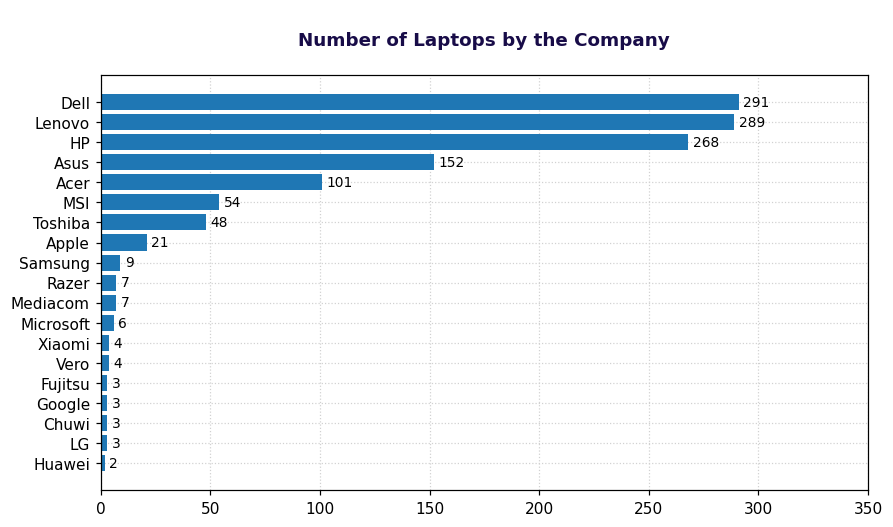

In [51]:
fig, ax = plt.subplots(figsize=(9,5), dpi=110)

plt.barh(count_laptops.index, count_laptops)

plt.title('\nNumber of Laptops by the Company\n', color='#180C48', fontsize=12, fontweight='bold')
plt.xticks(ticks= np.arange(0, 351, 50))

for idx, val in enumerate(count_laptops):
    ax.text(val+2, idx, str(val), va='center', fontsize=9)



ax.set_axisbelow(True)
ax.grid(color='#D1D1D1', linestyle='dotted')
plt.show()


In [52]:
num_laptops = count_laptops.sort_values(ascending=False)
num_laptops = num_laptops.rename('Number of Laptops')

In [53]:
percent_laptops = count_laptops.sort_values(ascending=False) / count_laptops.sum() * 100
percent_laptops = percent_laptops.apply(lambda x: str(round(x, 2)) + '%')
percent_laptops = percent_laptops.rename('Percentage of Laptops')

In [54]:
df_num_laptops = pd.concat([num_laptops, percent_laptops], axis=1)

In [55]:
print('\n -> The best 5 companies with a lot of laptop variety are:\n')
df_num_laptops[:5]


 -> The best 5 companies with a lot of laptop variety are:



Number of Laptops Percentage of Laptops
Dell                  291                22.82%
Lenovo                289                22.67%
HP                    268                21.02%
Asus                  152                11.92%
Acer                  101                 7.92%

# 

### âž¥ What's the average price of a laptop by the company?

In [56]:
average_price = df.loc[:, ['Company','Price_euros']].groupby('Company').mean()

In [57]:
average_price = average_price.sort_values('Price_euros')

In [58]:
average_price

Price_euros
Company               
Vero            217.43
Mediacom        295.00
Chuwi           314.30
Acer            633.46
Fujitsu         729.00
HP            1,080.31
Lenovo        1,093.86
Asus          1,123.83
Xiaomi        1,133.46
Dell          1,199.23
Toshiba       1,267.81
Samsung       1,413.44
Huawei        1,424.00
Apple         1,564.20
Microsoft     1,612.31
Google        1,677.67
MSI           1,728.91
LG            2,099.00
Razer         3,346.14

In [59]:
average_price = average_price['Price_euros'].apply(lambda x: np.round(x, 2))

In [60]:
average_price

Company
Vero          217.42
Mediacom      295.00
Chuwi         314.30
Acer          633.46
Fujitsu       729.00
HP          1,080.31
Lenovo      1,093.86
Asus        1,123.83
Xiaomi      1,133.46
Dell        1,199.23
Toshiba     1,267.81
Samsung     1,413.44
Huawei      1,424.00
Apple       1,564.20
Microsoft   1,612.31
Google      1,677.67
MSI         1,728.91
LG          2,099.00
Razer       3,346.14
Name: Price_euros, dtype: float64

In [61]:
average_price_text_format = average_price.apply(lambda x: 'â‚¬' + str(x) if len(str(x).split('.')[-1]) == 2 else 'â‚¬' + str(x) + '0') 

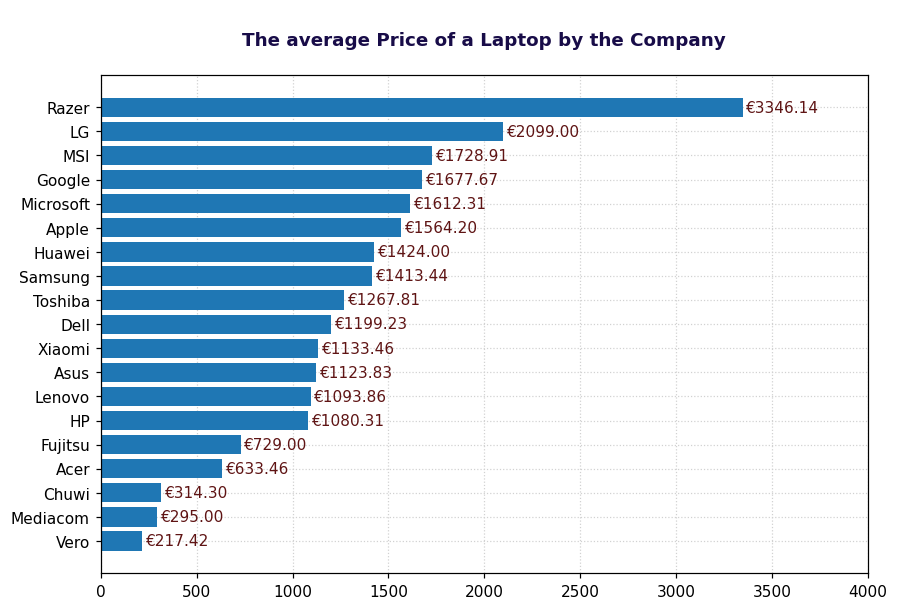

In [62]:
fig, ax = plt.subplots(figsize=(9,6), dpi=110)

plt.barh(average_price.index, average_price)

plt.title('\nThe average Price of a Laptop by the Company\n', color='#180C48', fontsize=12, fontweight='bold')
plt.xticks(ticks=np.arange(0, 4001, 500))

for (idx, val), price in zip(enumerate(average_price), average_price_text_format):
    ax.text(val+20, idx, price, va='center', color='#5F1414', fontweight='light')


ax.set_axisbelow(True)
ax.grid(color='#D1D1D1', linestyle='dotted')
plt.show()

# 

### âž¥ What is the price of the most expensive laptop of each company?

In [63]:
max_price = df.groupby('Company')['Price_euros'].max()
max_price = max_price.rename('Max_price')

In [64]:
min_price = df.groupby('Company')['Price_euros'].min()
min_price = min_price.rename('Min_price')

In [65]:
most_expensive_and_cheapest = pd.concat([ min_price, max_price], axis=1)

In [66]:
most_expensive_and_cheapest.sort_values('Max_price', ascending=False, inplace=True)

In [67]:
most_expensive_and_cheapest

Min_price  Max_price
Company                        
Razer       1,029.00   6,099.00
Lenovo        229.00   4,899.00
HP            209.00   4,389.00
Asus          191.90   3,975.00
Dell          274.90   3,659.40
Apple         898.94   2,858.00
Toshiba       447.00   2,799.00
MSI           839.00   2,799.00
Acer          174.00   2,599.00
Microsoft     989.00   2,589.00
LG          1,899.00   2,299.00
Google      1,275.00   2,199.00
Samsung       269.00   1,849.00
Huawei      1,349.00   1,499.00
Xiaomi        935.00   1,399.95
Fujitsu       649.00     799.00
Chuwi         244.99     449.00
Mediacom      239.00     389.00
Vero          196.00     260.00

In [68]:
most_expensive_and_cheapest.shape

(19, 2)

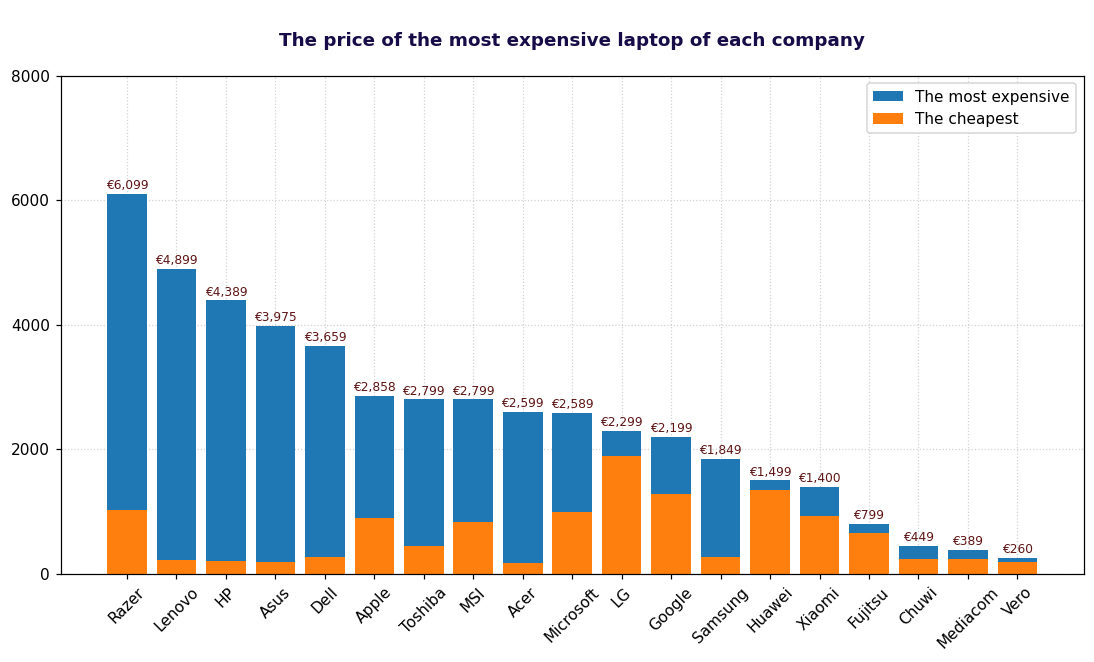


 -> A quick note: The Prices from the graph are the maximum price of a laptop by the company!



In [69]:
fig, ax = plt.subplots(figsize=(12,6), dpi=110)

plt.bar(most_expensive_and_cheapest.index, most_expensive_and_cheapest['Max_price'], label='The most expensive')
plt.bar(most_expensive_and_cheapest.index, most_expensive_and_cheapest['Min_price'], label='The cheapest')


plt.title('\nThe price of the most expensive laptop of each company\n', color='#180C48', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(0, 8001, 2000))


for idx, val in enumerate(most_expensive_and_cheapest['Max_price']):
    ax.text(idx, val+80, f'â‚¬{round(val):,}', ha='center', color='#5F1414', fontweight='light', fontsize=8)


    
plt.legend()
ax.set_axisbelow(True)
ax.grid(color='#D1D1D1', linestyle='dotted')
plt.show()

print('\n -> A quick note: The Prices from the graph are the maximum price of a laptop by the company!\n')

# 

### âž¥ What are the best top 5 Laptops reported at price?

In [70]:
top5_laptops = df.sort_values('Price_euros', ascending=False).head(5)

In [71]:
top5_laptops

Company       Product     TypeName  Inches  \
196    Razer     Blade Pro       Gaming   17.30   
830    Razer     Blade Pro       Gaming   17.30   
610   Lenovo  Thinkpad P51     Notebook   15.60   
749       HP      Zbook 17  Workstation   17.30   
1066    Asus    ROG G701VO       Gaming   17.30   

                         ScreenResolution                            Cpu  \
196   4K Ultra HD / Touchscreen 3840x2160    Intel Core i7 7820HK 2.9GHz   
830   4K Ultra HD / Touchscreen 3840x2160    Intel Core i7 7820HK 2.9GHz   
610       IPS Panel 4K Ultra HD 3840x2160  Intel Xeon E3-1535M v6 3.1GHz   
749           IPS Panel Full HD 1920x1080  Intel Xeon E3-1535M v5 2.9GHz   
1066          IPS Panel Full HD 1920x1080    Intel Core i7 6820HK 2.7GHz   

      Ram_GB First Storage Second Storage                      Gpu  \
196       32       1TB SSD            NaN  Nvidia GeForce GTX 1080   
830       32     512GB SSD            NaN  Nvidia GeForce GTX 1080   
610       32       1TB SSD            NaN     Nvidia Quadro M2200M   
749       16     256GB SSD            NaN     Nvidia Quadro M2000M   
1066      64       1TB SSD            NaN  Nvidia GeForce GTX 980    

           OpSys  Weight_kg  Price_euros  
196   Windows 10       3.49     6,099.00  
830   Windows 10       3.49     5,499.00  
610   Windows 10       2.50     4,899.00  
749    Windows 7       3.00     4,389.00  
1066  Windows 10       3.58     3,975.00

In [72]:
top5_laptops['Laptop'] = top5_laptops['Company'].astype('object') + ' ' + top5_laptops['Product'].astype('object')

In [73]:
top5_laptops = top5_laptops.loc[:, ['Laptop', 'Price_euros']]
top5_laptops = top5_laptops.reset_index(drop=True)

In [74]:
condition = top5_laptops['Price_euros'] == 6099.00

top5_laptops.loc[condition, 'Laptop'] = 'Razer Blade Pro '

In [75]:
top5_laptops

Laptop  Price_euros
0     Razer Blade Pro      6,099.00
1      Razer Blade Pro     5,499.00
2  Lenovo Thinkpad P51     4,899.00
3          HP Zbook 17     4,389.00
4      Asus ROG G701VO     3,975.00

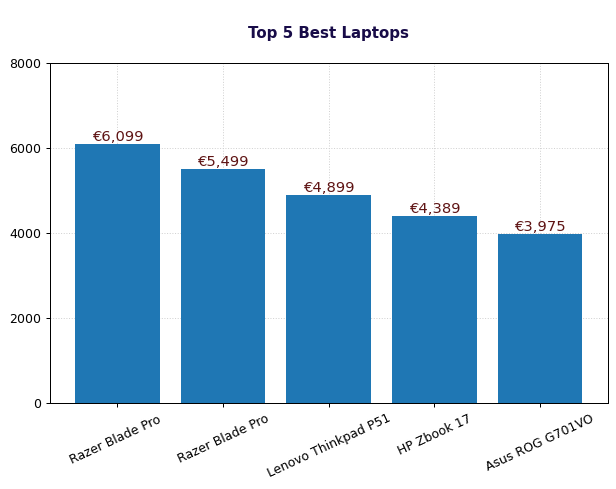

In [76]:
fig, ax = plt.subplots(figsize=(8,5), dpi=90)


plt.bar(top5_laptops['Laptop'], top5_laptops['Price_euros'])


plt.title('\nTop 5 Best Laptops\n', color='#180C48', fontsize=12, fontweight='bold')
plt.xticks(rotation=25)
plt.yticks(ticks=np.arange(0, 8001, 2000))

for idx, val in enumerate(top5_laptops['Price_euros']):
    ax.text(idx, val+80, f'â‚¬{round(val):,}', ha='center', color='#5F1414', fontweight='light', fontsize=11.8)


ax.set_axisbelow(True)
ax.grid(color='#D1D1D1', linestyle='dotted')
plt.show()

# 

### âž¥ Data Visualization Correlation

In [77]:
corrMatrix = df.corr()
corrMatrix

Inches  Ram_GB  Weight_kg  Price_euros
Inches         1.00    0.24       0.83         0.07
Ram_GB         0.24    1.00       0.39         0.74
Weight_kg      0.83    0.39       1.00         0.21
Price_euros    0.07    0.74       0.21         1.00

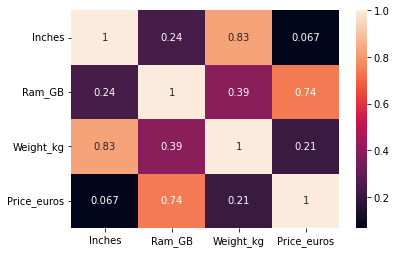

In [78]:
sn.heatmap(corrMatrix, annot=True)

plt.show()

In [79]:
print('\n -> We have a correlation between Ram and Price, which means they are positively correlated. More Ram on a Laptop is stronger related to a higher Price.')
print('\n -> Also there\'s a positive correlation between inches and weight. A higher display on a Laptop will result in a higher weight.\n')


 -> We have a correlation between Ram and Price, which means they are positively correlated. More Ram on a Laptop is stronger related to a higher Price.

 -> Also there's a positive correlation between inches and weight. A higher display on a Laptop will result in a higher weight.

